In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/cartoon2_result.png', img)


In [3]:
def render(img_rgb):
    img_rgb = cv2.resize(img_rgb, (1366, 768))
    numDownSamples = 2  # số lần giảm kích thước
    numBilateralFilters = 50 # số lần lọc song phương

    # Giảm kích thước ảnh bằng Gaussian pyramid
    img_color = img_rgb
    for _ in range(numDownSamples):
        img_color = cv2.pyrDown(img_color)

    # Áp dụng bộ lọc song phương để làm mịn ảnh
    for _ in range(numBilateralFilters):
        img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

    # Tạo ảnh cạnh bằng cách chuyển sang ảnh xám và làm mờ
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.medianBlur(img_gray, 3)
    img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                     cv2.THRESH_BINARY, 9, 2)

    # Chuyển img_edge thành RGB và thay đổi kích thước để phù hợp với img_color
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    img_edge = cv2.resize(img_edge, (img_color.shape[1], img_color.shape[0]))

    # Chồng ảnh cạnh lên ảnh màu đã làm mịn
    return cv2.bitwise_and(img_color, img_edge)

In [4]:
img = cv2.imread('../data/inp_images/tower.jpeg')
res = render(img)

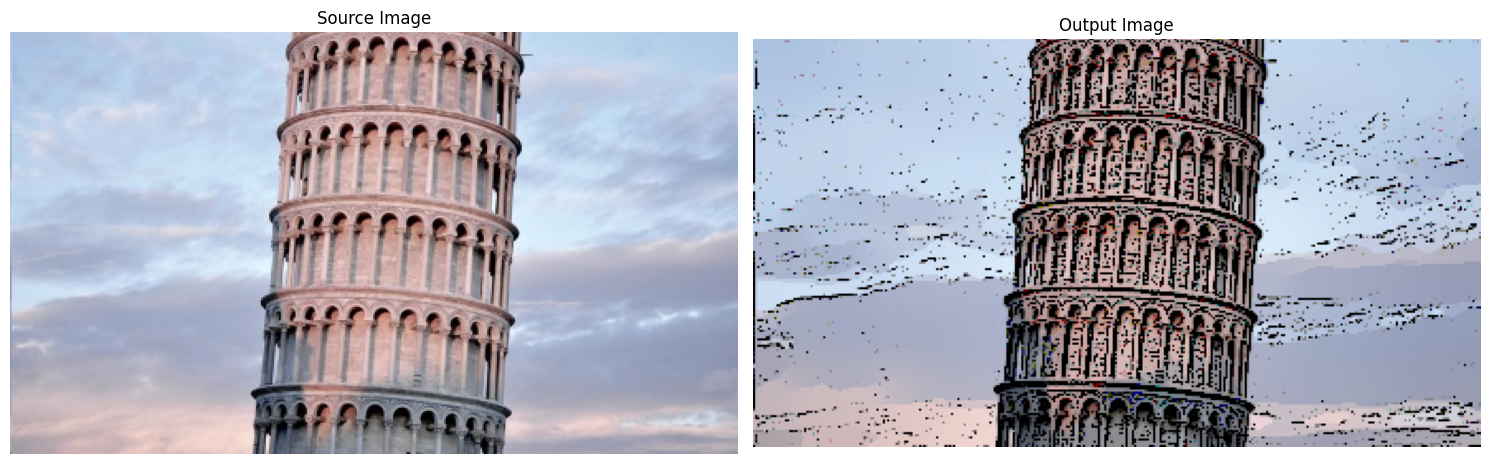

In [5]:
show_images(img, res)
save_image(res)